# Description

Files used: [htru2_pulsar_data](./Data/htru2/HTRU_2.csv), [htru2_pulsar_data_arff](./Data/htru2/HTRU_2.csv) <br>

# Loading Data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from types import SimpleNamespace

In [17]:
arffFilePath = './Data/htru2/HTRU_2.arff'
columnNames = []
with open(arffFilePath) as myfile:
    for i in range(20):
        arffLine = next(myfile).strip().split()
        if (arffLine[0] == '@attribute'):
            columnNames.append(arffLine[1])
            continue
        elif (arffLine[0] == '@data'):
            break
print(columnNames)

['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class']


In [18]:
dataFilePath = './Data/htru2/HTRU_2.csv'

dataset = pd.read_csv(dataFilePath, names=columnNames)
dataset

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# Data Statistics

In [19]:
dataset.shape

(17898, 9)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [21]:
dataset.describe(include='all')

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [24]:
dataset.isnull().sum()

Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64

In [28]:
dataset.duplicated(keep='first').sum()

0

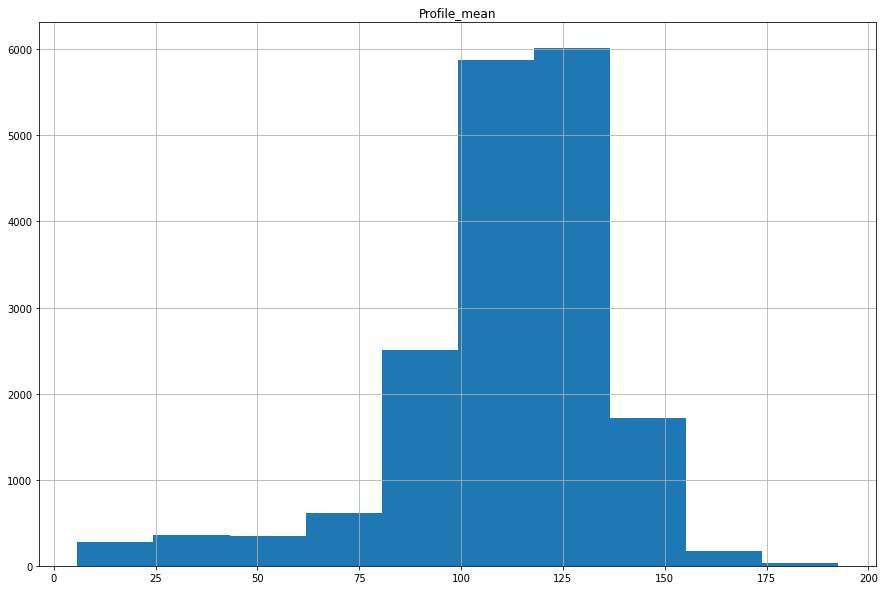

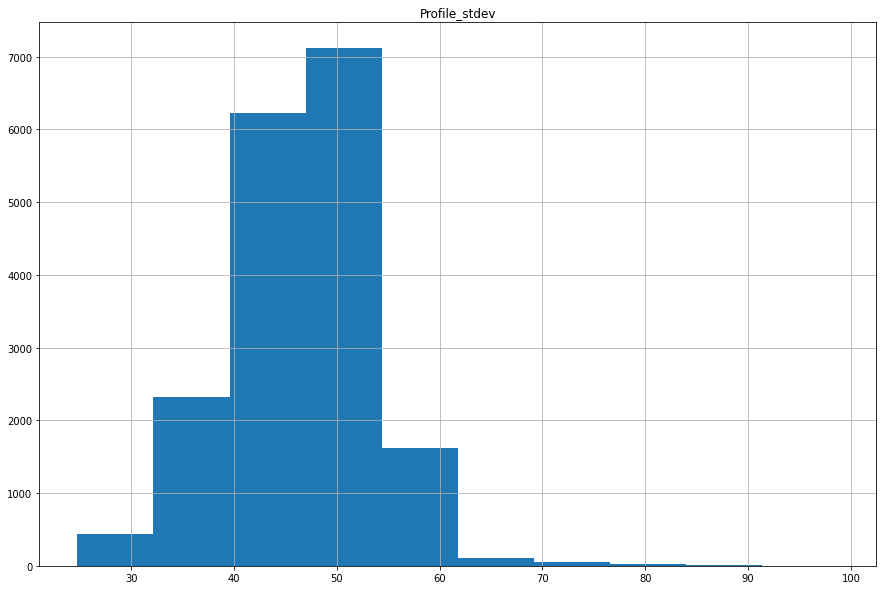

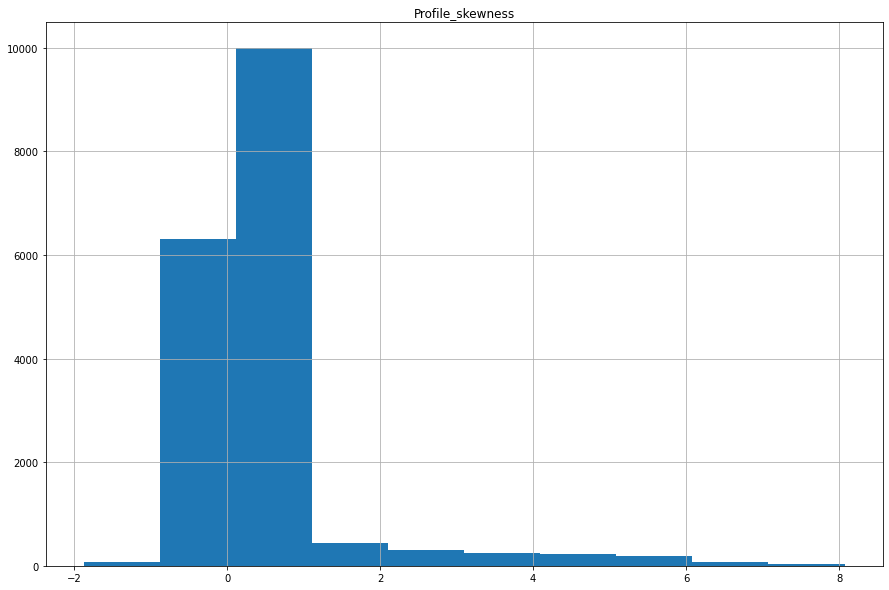

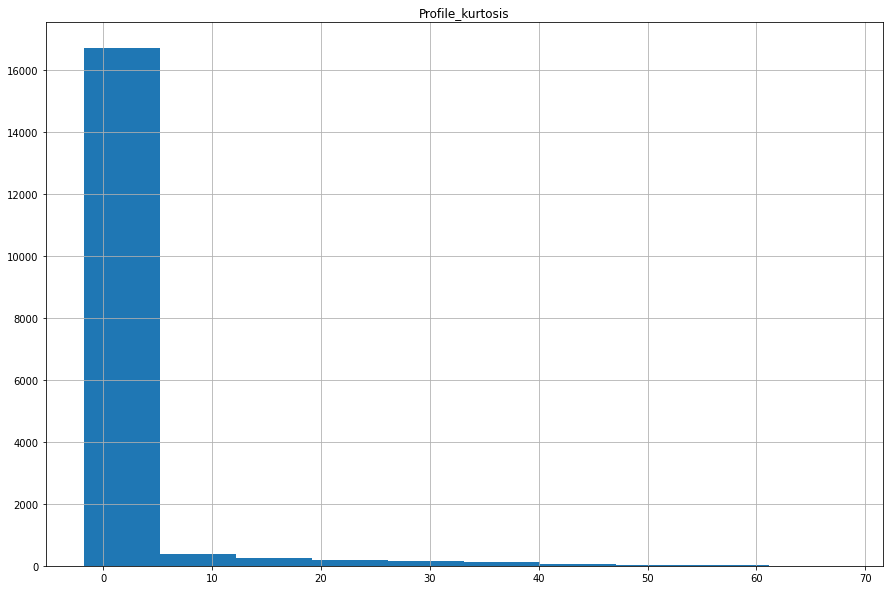

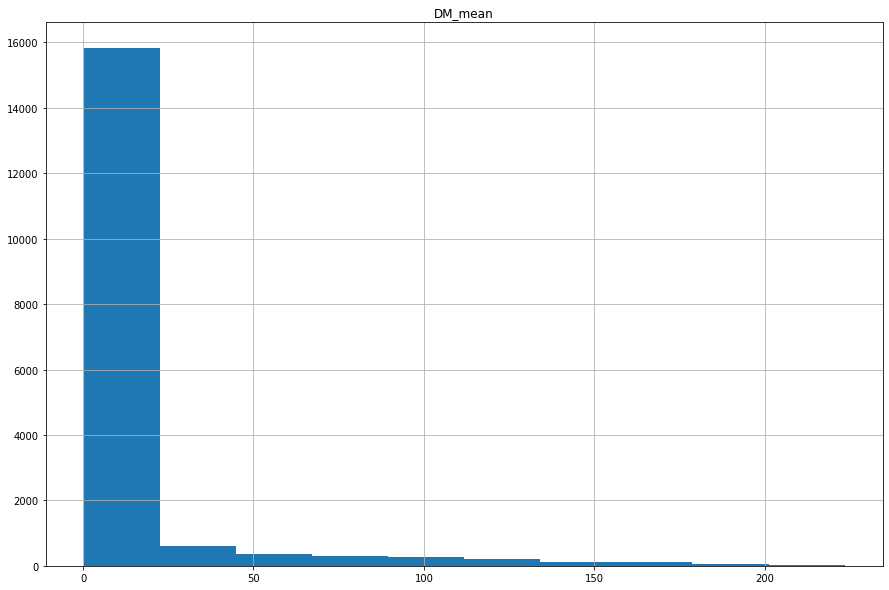

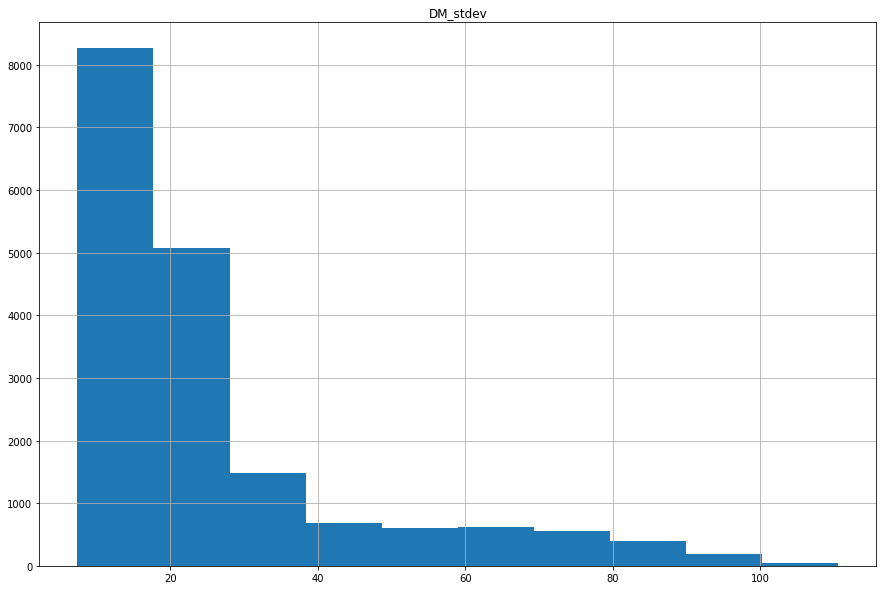

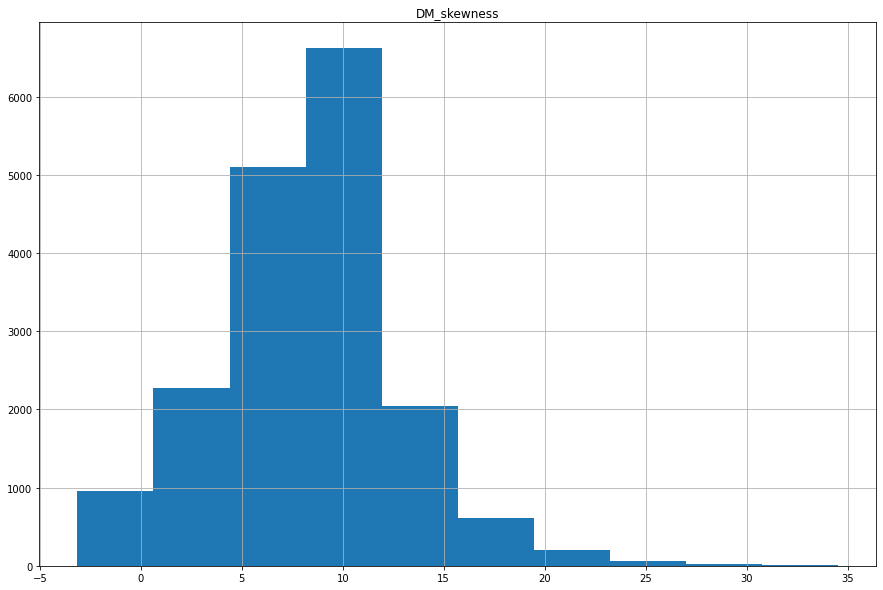

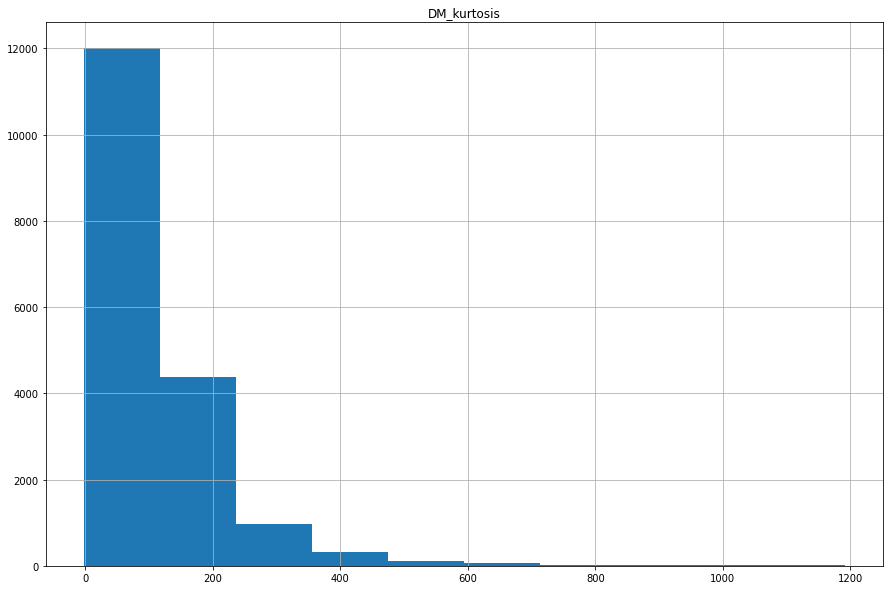

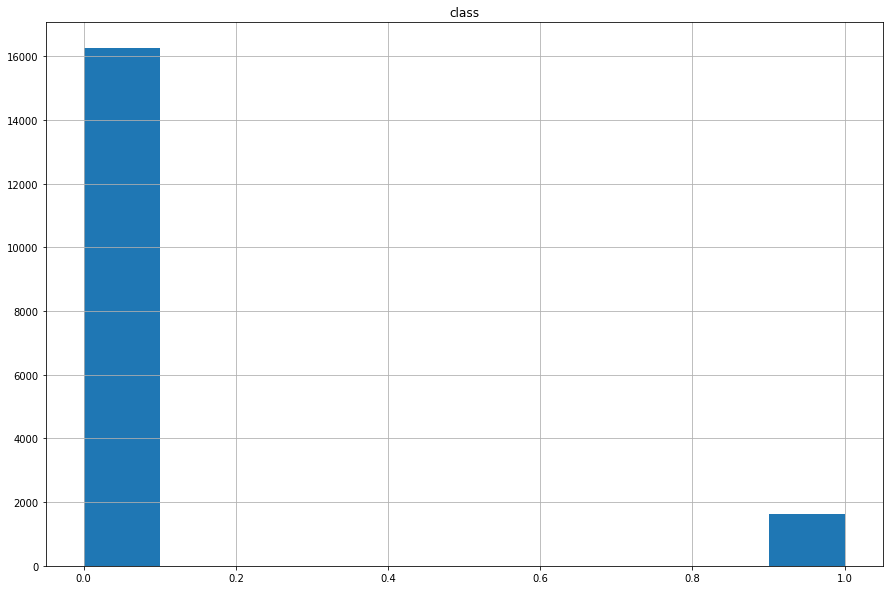

In [30]:
datasetClass = dataset['class']
features = dataset.loc[:, dataset.columns != 'class']
categoricFeaturesList = list(dataset.dtypes[dataset.dtypes == object].index)
numericFeaturesList = list(dataset.dtypes[dataset.dtypes != object].index)
for column in dataset.columns:
    if (dataset.dtypes[column].name.__eq__('object')):
        sb.catplot(x=column, kind='count', data=dataset, height=10, aspect=2)
    else:
        dataset.hist(column=column, figsize=[15,10])

## Correlation

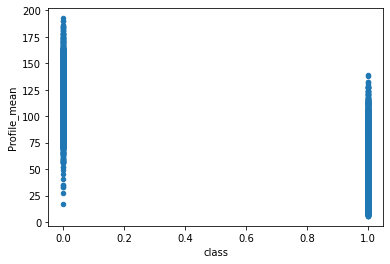

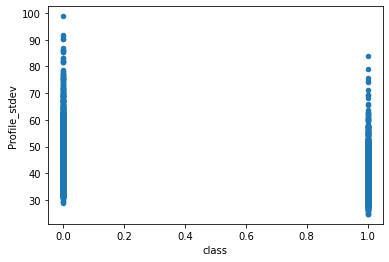

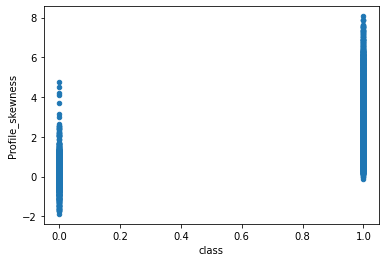

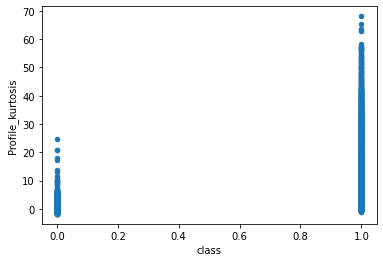

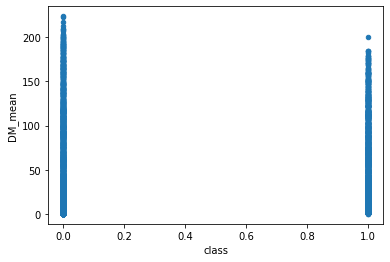

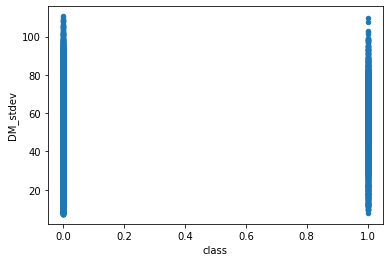

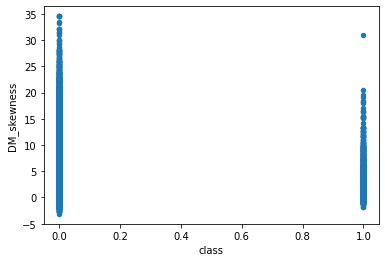

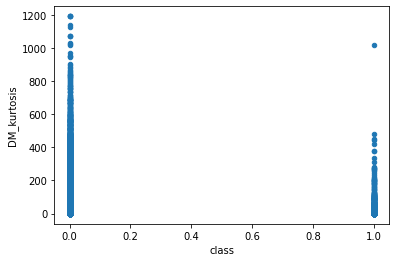

In [32]:
for column in dataset.columns:
    if (column != 'class'):
        dataset.plot(x='class', y=column, kind='scatter')

<AxesSubplot:>

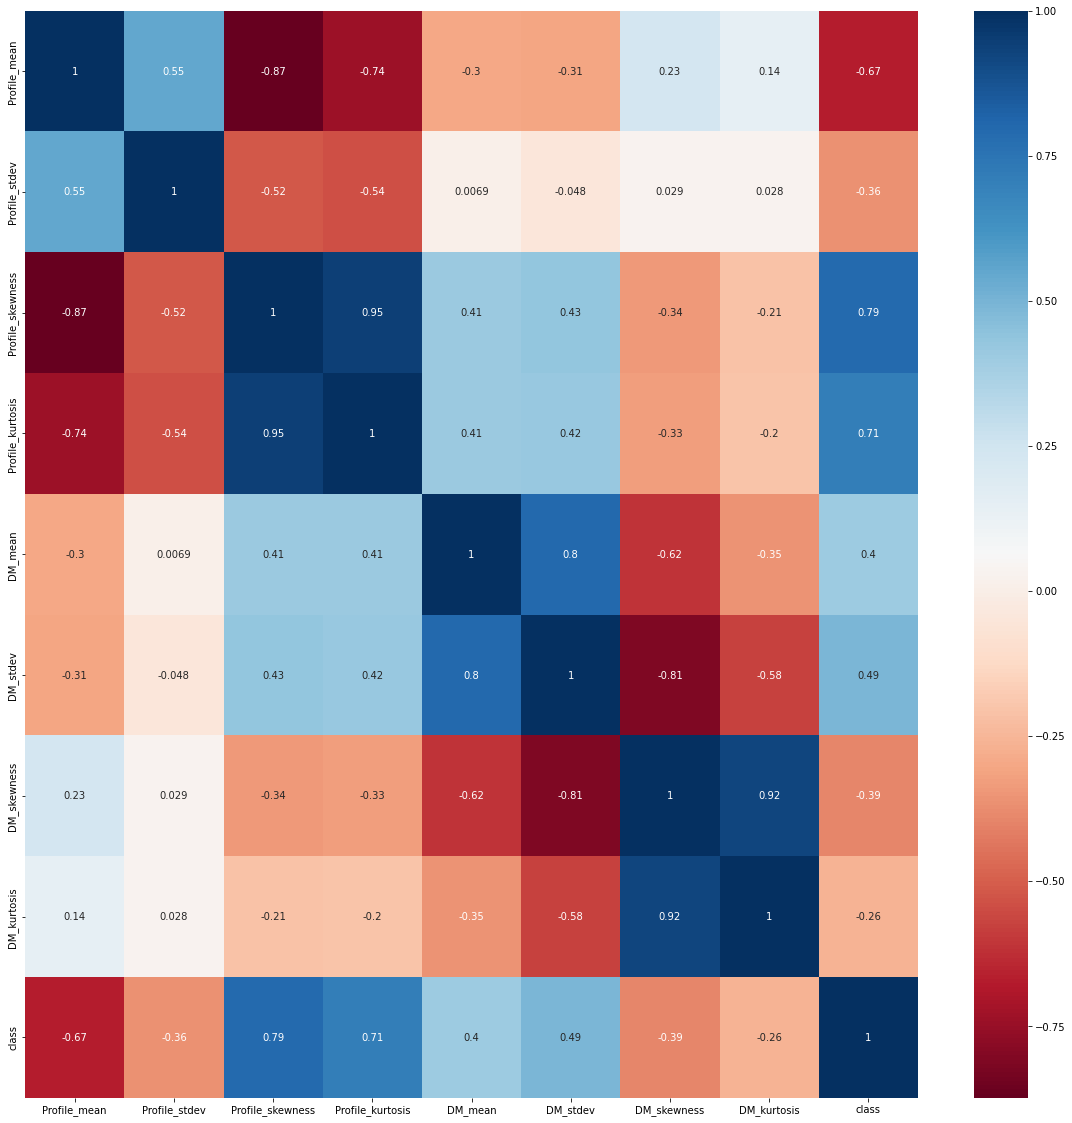

In [33]:
fig, ax = plt.subplots(figsize = (20,20))
sb.heatmap(dataset.corr(method='pearson'), annot=True, cmap='RdBu', ax=ax)